# **Employee at Risk!** 📌

Here is my notebook on the classification problem of predicting the employees at risk, working with the dataset 

https://www.kaggle.com/manasdalakoti/univai-hack-data



# **Importing the libraries**

**Hello everyone**,

This is my take on the binary classification of determining employees who are at a risk of termination or not.

It is a Binary Classification Problem. The tools used are:

**Pandas** for data manipulation and ingestion

**Numpy** for multidimensional array computing

**Matplotlib** and seaborn for data visualization

**Word Cloud** for geeting the most populare string

**Imblearn** for oversampling of the model

**Scikit** Learn for Data Preprocessing



# For modelling:

**Random Forest** Classifier: 

> Accuracy Reached: **95.74%**

**XG Boost** Classifier:

> Accuracy Reached: **93.17%**

**Light Gradient Boosting**:

> Accuracy Reached: **91.10%**

**Cat Boost** classifier:

> Accuracy Reached: **95.74%**

-> Feel free to leave any *suggestions* in the comments for the betterment of the notebook.

-> Thank you for your time,**CHEERS**!🌟

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

# **Loading the dataset**

In [2]:
train_data=pd.read_csv("../input/univai-hack-data/Training Data.csv")
test_data=pd.read_csv("../input/univai-hack-data/Test Data.csv")

# **Data Analysis**

In [3]:
print("Shape of train :", train_data.shape)
print("Shape of test :", test_data.shape)

Shape of train : (252000, 13)
Shape of test : (28000, 12)


In [4]:
train_data.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


***Checking for the presence of NULL values*** 

In [6]:
train_data.isnull().any()

Id                     False
income                 False
age                    False
experience             False
married                False
house_ownership        False
car_ownership          False
profession             False
city                   False
state                  False
current_job_years      False
current_house_years    False
risk_flag              False
dtype: bool

In [7]:
test_data.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [8]:
test_data.isnull().any()

id                     False
income                 False
age                    False
experience             False
married                False
house_ownership        False
car_ownership          False
profession             False
city                   False
state                  False
current_job_years      False
current_house_years    False
dtype: bool

In [9]:
train_data['risk_flag'].value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

**finding the percentage of employee at risk**

In [10]:


risk = (30996/252000)*100
print("Percentage of Employees at risk is {:.2f}%".format(risk))

Percentage of Employees at risk is 12.30%


**finding the percentage of Employee at no risk**

In [11]:


no_risk = (221004/252000)*100
print("Percentage of Employees at no risk is {:.2f}%".format(no_risk))

Percentage of Employees at no risk is 87.70%


# Data Visualization

**plotting a scatter plot**

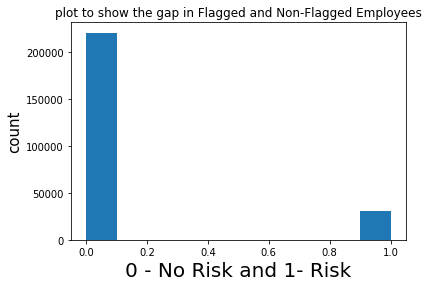

In [12]:


plt.hist(train_data['risk_flag'])
plt.title('plot to show the gap in Flagged and Non-Flagged Employees')
plt.xlabel('0 - No Risk and 1- Risk', fontsize = 20)
plt.ylabel('count',fontsize= 15)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


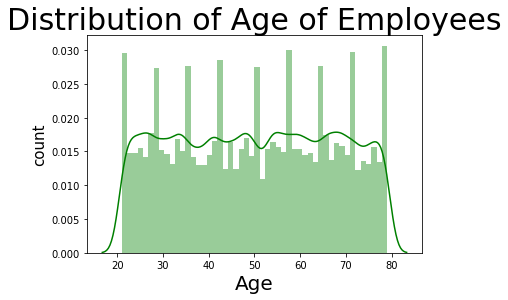

In [13]:
# checking the distribution of age of Employees in the company

sns.distplot(train_data['age'], color = 'green')
plt.title('Distribution of Age of Employees', fontsize = 30)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('count',fontsize=15)
plt.show()

**Boxplot for determing IQR minimum and maximum**

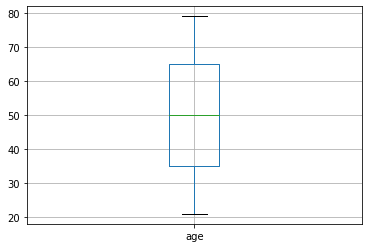

In [14]:
boxplot=train_data.boxplot(column=['age'])

**Dividing the age column into different groups:**

**0** denotes young people

**1** denotes middle age employee

**2** denotes more aged employee

**3** denotes elderly employee

In [15]:
train_test_data=[train_data, test_data]

for dataset in train_test_data: 

     dataset.loc[(dataset['age'] >= 20) & (dataset['age']<35), 'age'] = 0 

     dataset.loc[(dataset['age'] >= 35) & (dataset['age'] < 50), 'age'] = 1 

     dataset.loc[(dataset['age'] >= 50) & (dataset['age'] < 65), 'age'] = 2 

     dataset.loc[(dataset['age'] >= 65) , 'age'] = 3 

In [16]:
train_data.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,0,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,1,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,3,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,1,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,1,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


**Making a correlation function in form a bar chart**

In [17]:
def bar_chart(feature):
    risk = train_data[train_data['risk_flag']==1][feature].value_counts()
    no_risk = train_data[train_data['risk_flag']==0][feature].value_counts()
    df = pd.DataFrame([risk,no_risk])
    df.index = ['risk','no risk']
    df.plot(kind='bar',stacked=True, figsize=(20,8))

In [18]:
test_data.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,2,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,0,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,2,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,1,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,0,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


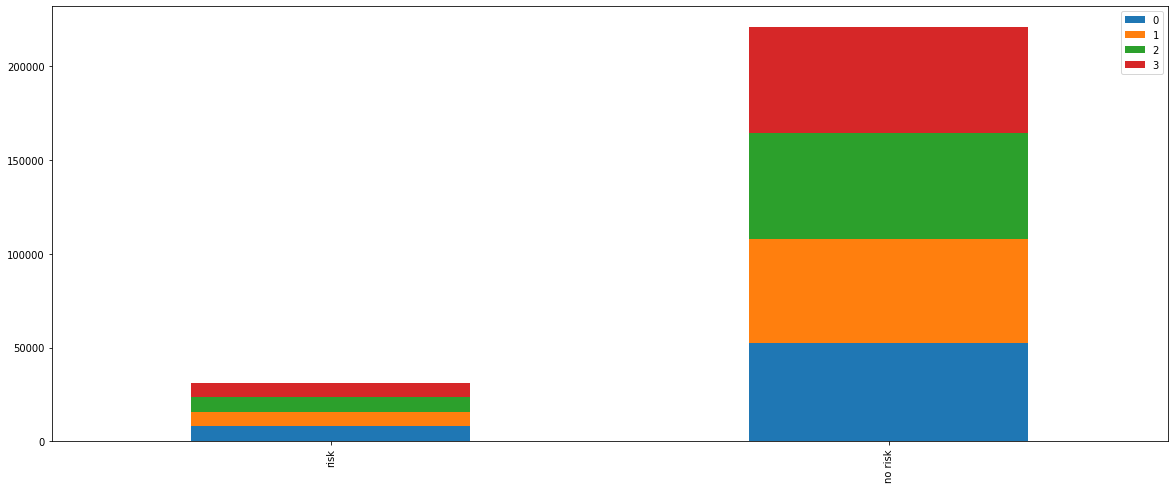

In [19]:
bar_chart('age')

*The graph shows that there is not much variation with age group with respect to the risk factor as all the age groups have equal distribution of risk of termination in proportion*

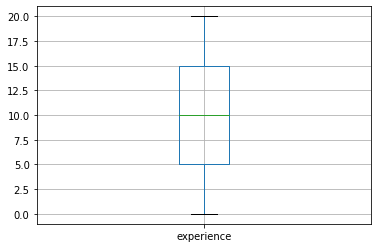

In [20]:
boxplot=train_data.boxplot(column=['experience'])

**Dividing the experience column into different groups:**

**0** denotes intern/novice

**1** denotes a mid level experienced employee 

**2** denotes seasoned employee

**3** denotes a veteran employee

In [21]:
train_test_data=[train_data, test_data]

for dataset in train_test_data: 

     dataset.loc[(dataset['experience']<5), 'experience'] = 0 

     dataset.loc[(dataset['experience'] >= 5) & (dataset['experience'] < 10), 'experience'] = 1 

     dataset.loc[(dataset['experience'] >= 10) & (dataset['experience'] < 15), 'experience'] = 2 

     dataset.loc[(dataset['experience'] >= 15) , 'experience'] = 3 

In [22]:
train_data.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,0,0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,1,2,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,3,0,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,1,0,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,1,2,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [23]:
test_data.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,2,3,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,0,1,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,2,2,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,1,1,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,0,3,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


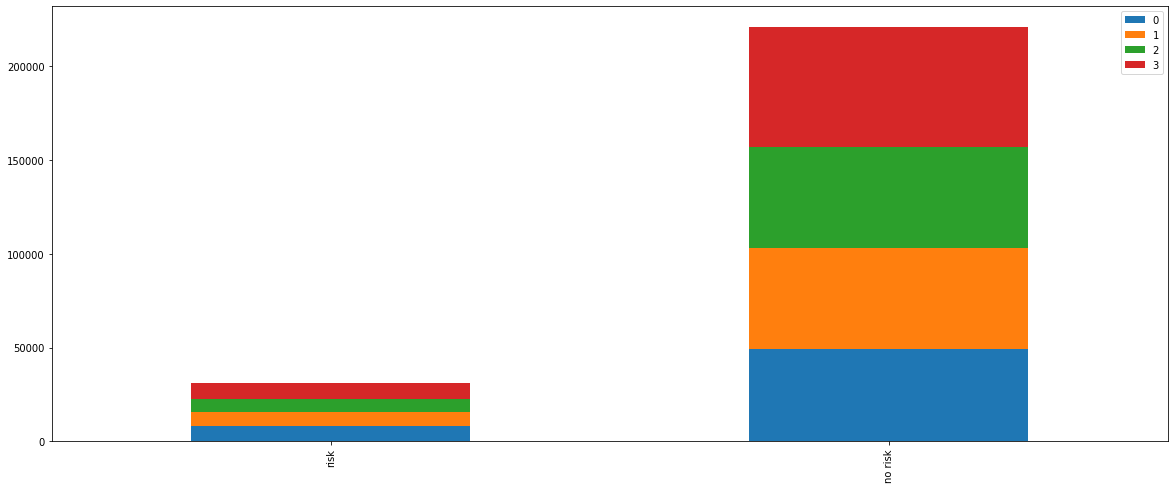

In [24]:
bar_chart('experience')

*The distribution of age is pretty much balanced too*

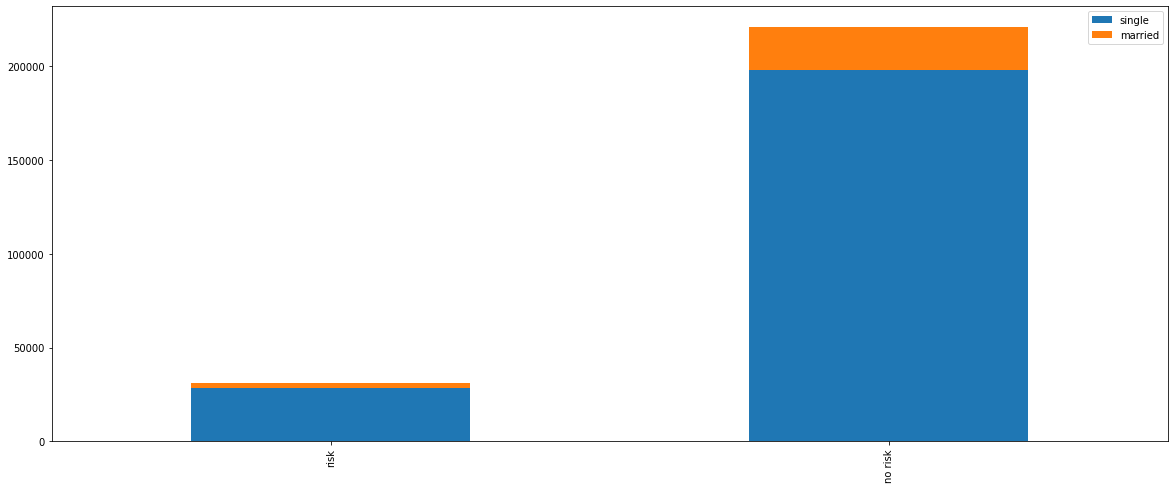

In [25]:
bar_chart('married')

In [26]:
train_data['house_ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64

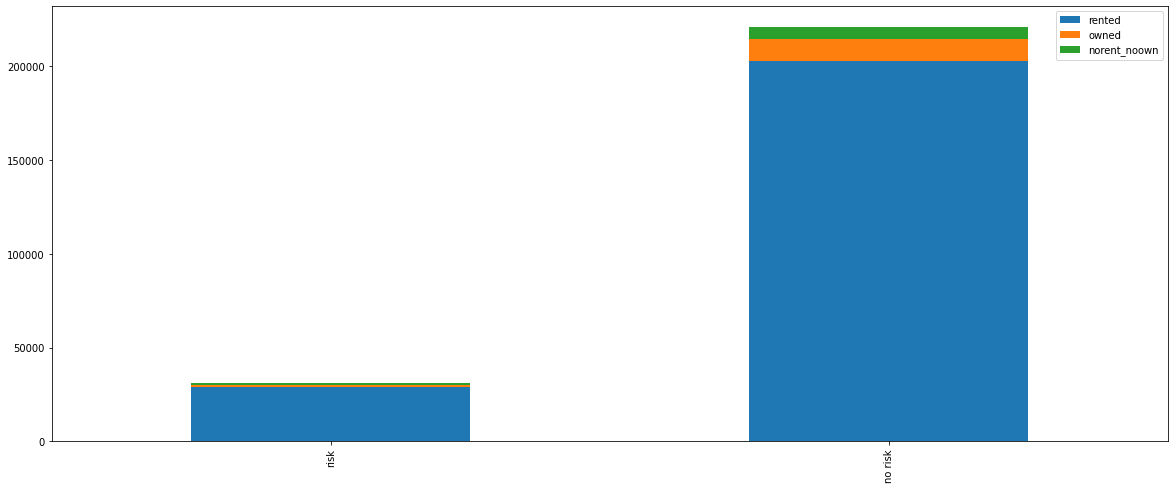

In [27]:
bar_chart('house_ownership')

*We can see that most of the employees have rented house follwed by owners and then non rented, but it's distribution of risk is eqaully spread out.*

In [28]:


train_data['married'].value_counts()

single     226272
married     25728
Name: married, dtype: int64

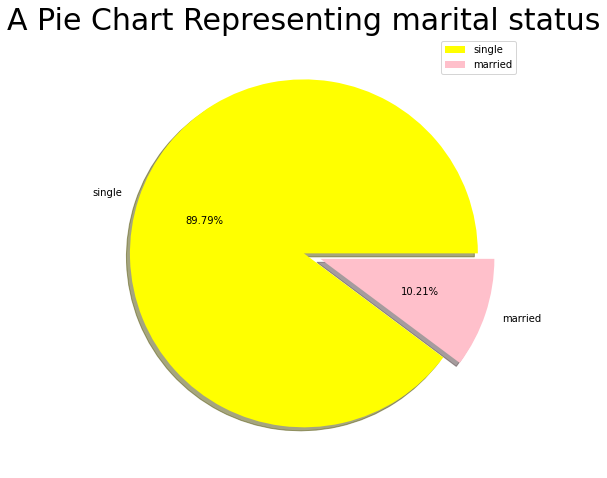

In [29]:
# plotting a pie chart

size = [226272, 25728]
labels = "single", "married"
colors = ['yellow', 'pink']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing marital status', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()


In [30]:


train_data['car_ownership'].value_counts()

no     176000
yes     76000
Name: car_ownership, dtype: int64

Plotting pie chart

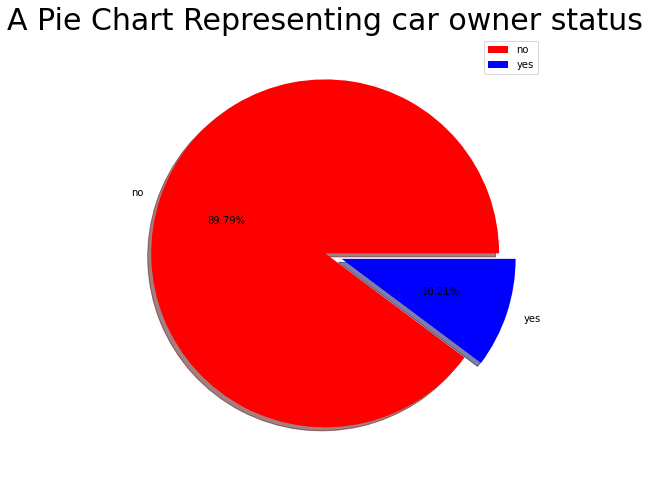

In [31]:


size = [226272, 25728]
labels = "no", "yes"
colors = ['red', 'blue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing car owner status', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

**checking dependency of marriage over risk**

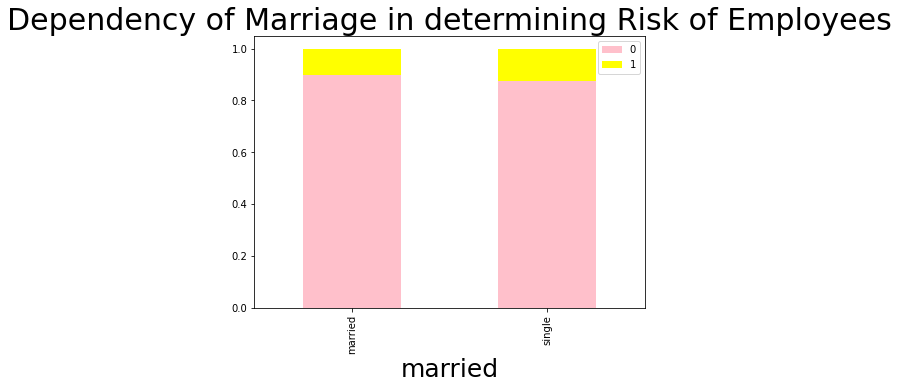

In [32]:


data = pd.crosstab(train_data['married'], train_data['risk_flag'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5), color = ['pink', 'yellow'])

plt.title('Dependency of Marriage in determining Risk of Employees', fontsize = 30)
plt.xlabel('married', fontsize = 25)
plt.legend()
plt.show()


**checking dependency of car ownership over risk**

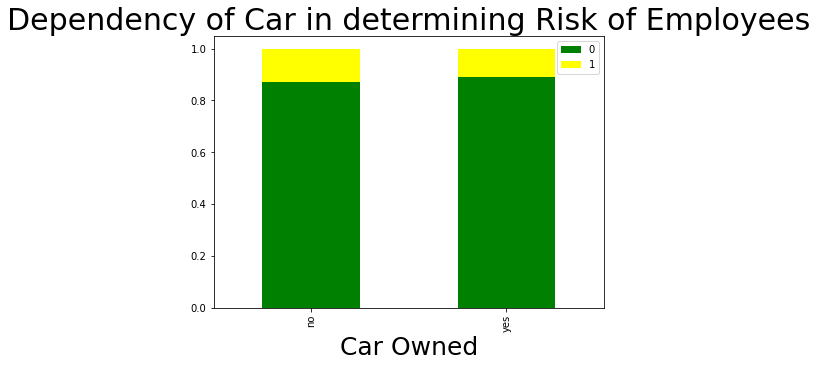

In [33]:


data = pd.crosstab(train_data['car_ownership'], train_data['risk_flag'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5), color = ['green', 'yellow'])

plt.title('Dependency of Car in determining Risk of Employees', fontsize = 30)
plt.xlabel('Car Owned', fontsize = 25)
plt.legend()
plt.show()

In [34]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


**Searching for the most popular professions**

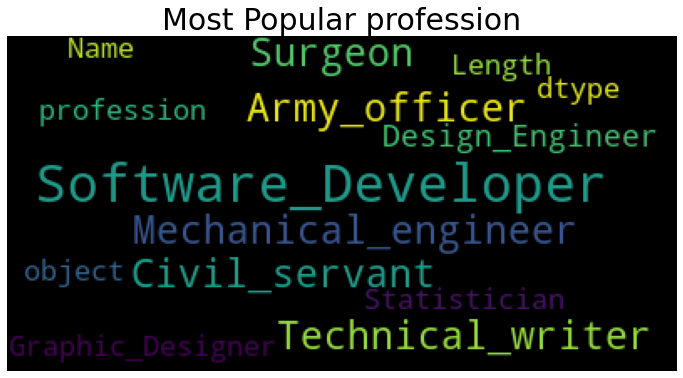

In [35]:


from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopword = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopword).generate(str(train_data['profession']))

plt.rcParams['figure.figsize'] = (12, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular profession', fontsize = 30)
plt.axis('off')
plt.show()

**Showcasing different states**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


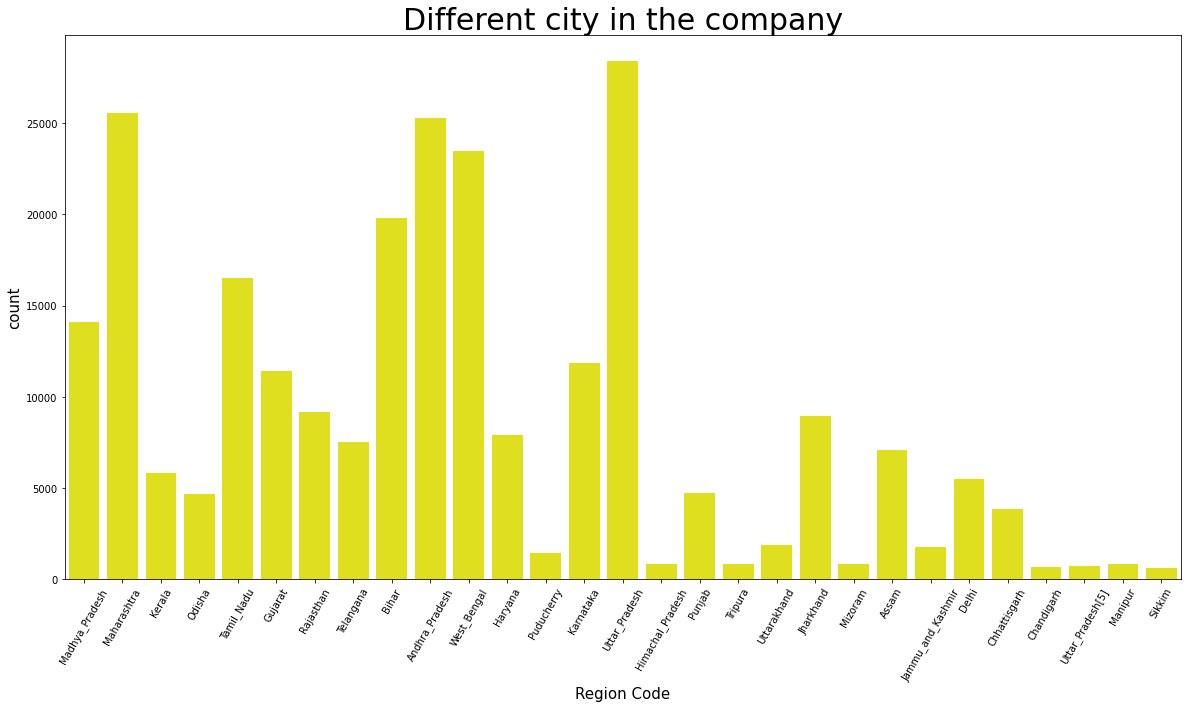

In [36]:


plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(train_data['state'], color = 'yellow')
plt.title('Different city in the company', fontsize = 30)
plt.xticks(rotation = 60)
plt.xlabel('Region Code', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

**checking the distribution of length of service**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


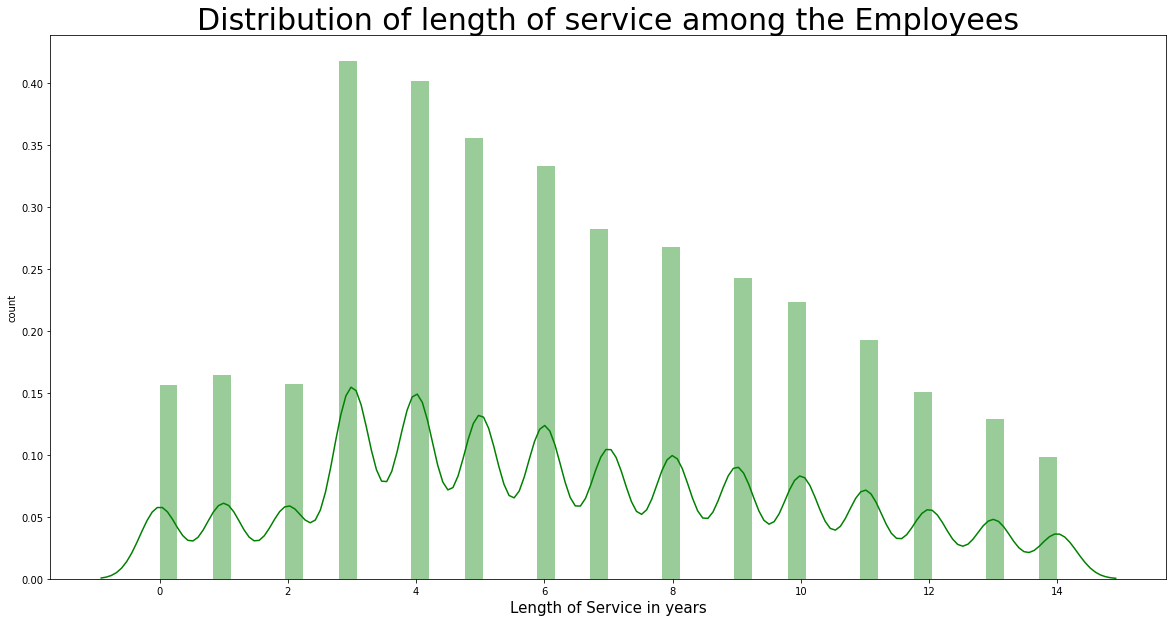

In [37]:


sns.distplot(train_data['current_job_years'], color = 'green')
plt.title('Distribution of length of service among the Employees', fontsize = 30)
plt.xlabel('Length of Service in years', fontsize = 15)
plt.ylabel('count')
plt.show()

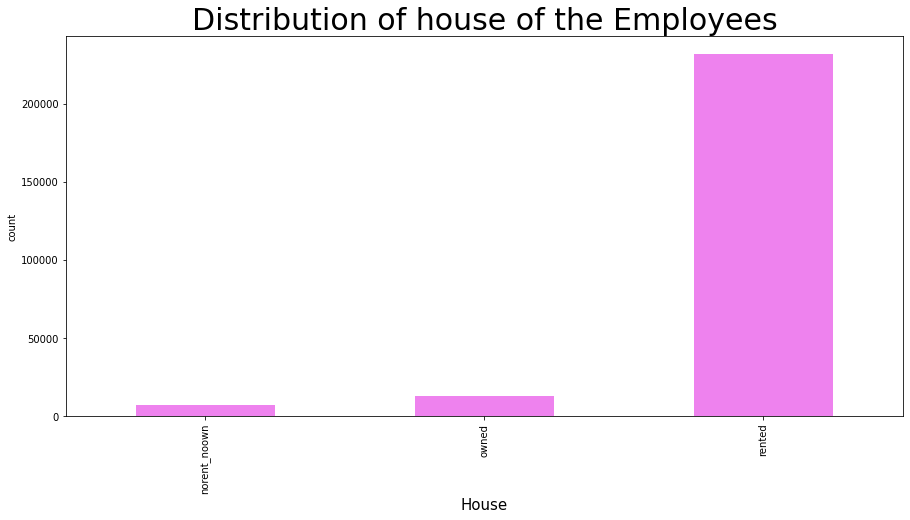

In [38]:
train_data['house_ownership'].value_counts().sort_values().plot.bar(color = 'violet', figsize = (15, 7))
plt.title('Distribution of house of the Employees', fontsize = 30)
plt.xlabel('House', fontsize = 15)
plt.ylabel('count')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


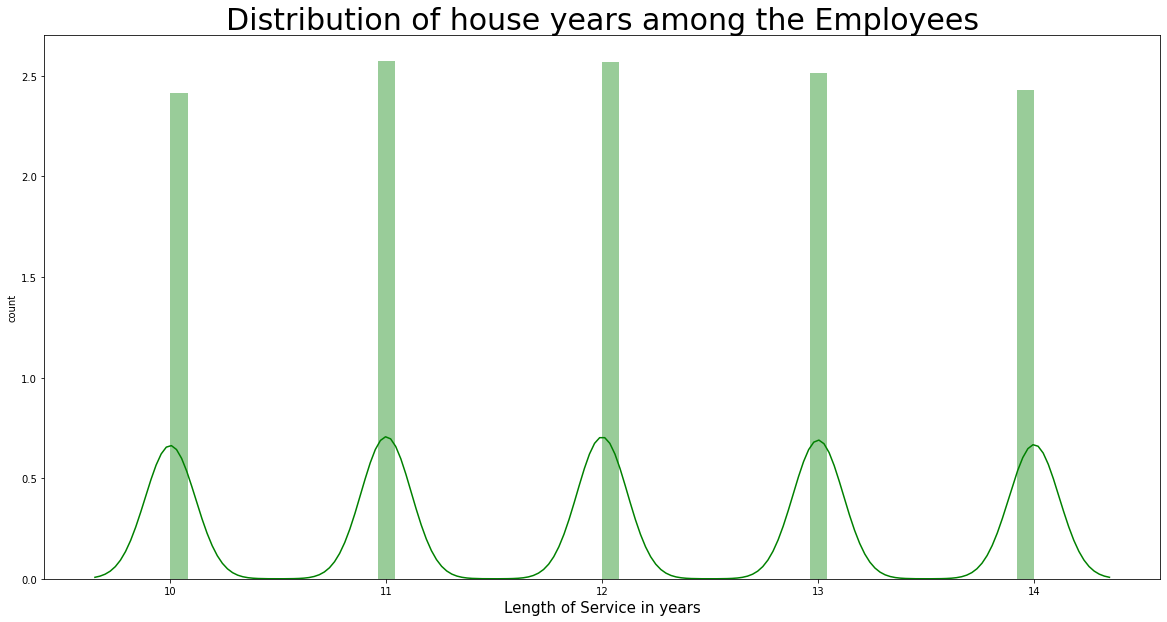

In [39]:


sns.distplot(train_data['current_house_years'], color = 'green')
plt.title('Distribution of house years among the Employees', fontsize = 30)
plt.xlabel('Length of Service in years', fontsize = 15)
plt.ylabel('count')
plt.show()

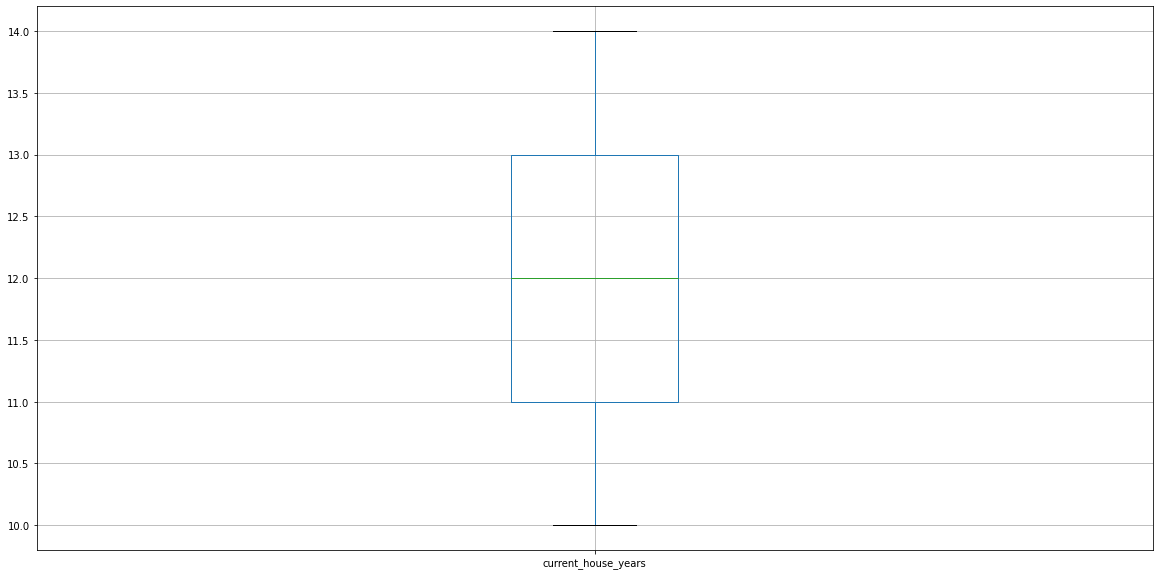

In [40]:
boxplot=train_data.boxplot(column=['current_house_years'])

*performing statistical analysis of the income column*

In [41]:
train_data['income'].describe()

count    2.520000e+05
mean     4.997117e+06
std      2.878311e+06
min      1.031000e+04
25%      2.503015e+06
50%      5.000694e+06
75%      7.477502e+06
max      9.999938e+06
Name: income, dtype: float64

**Dividing the income column into different groups:**

**0** denotes intern/novice

**1** denotes a mid level earner employee 

**2** denotes handsome salary owner employee

**3** denotes a veteran employee

In [42]:
train_test_data=[train_data, test_data]

for dataset in train_test_data: 

     dataset.loc[(dataset['income']<2612345), 'income'] = 0 

     dataset.loc[(dataset['income'] >= 2612345) & (dataset['income'] < 5212345), 'income'] = 1 

     dataset.loc[(dataset['income'] >= 5212345) & (dataset['income'] < 7512345), 'income'] = 2 

     dataset.loc[(dataset['income'] >= 7512345) , 'income'] = 3 

In [43]:
train_data.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,0,0,0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,3,1,2,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,1,3,0,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,2,1,0,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,2,1,2,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [44]:
test_data.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,2,2,3,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,0,0,1,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,3,2,2,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,0,1,1,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,0,0,3,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


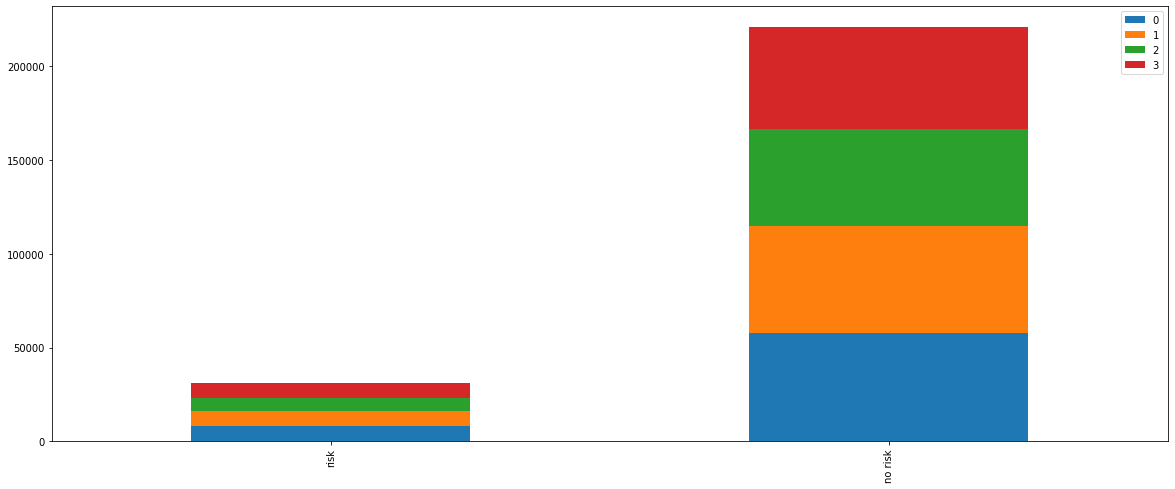

In [45]:
bar_chart('income')

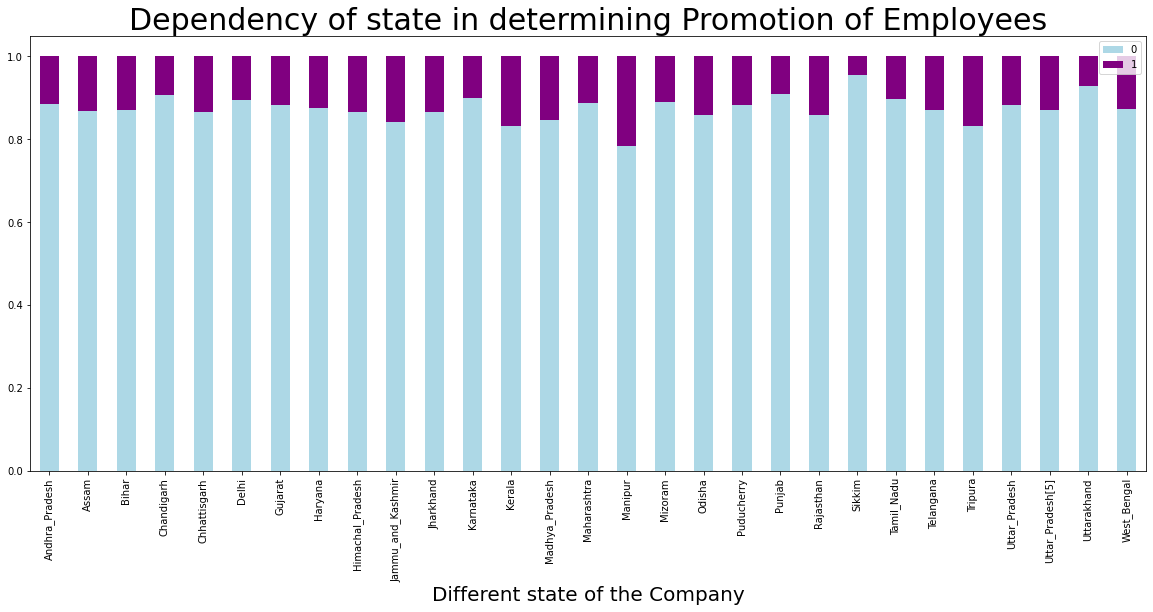

In [46]:
# checking dependency of different regions in promotion

data = pd.crosstab(train_data['state'], train_data['risk_flag'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'purple'])

plt.title('Dependency of state in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different state of the Company', fontsize = 20)
plt.legend()
plt.show()

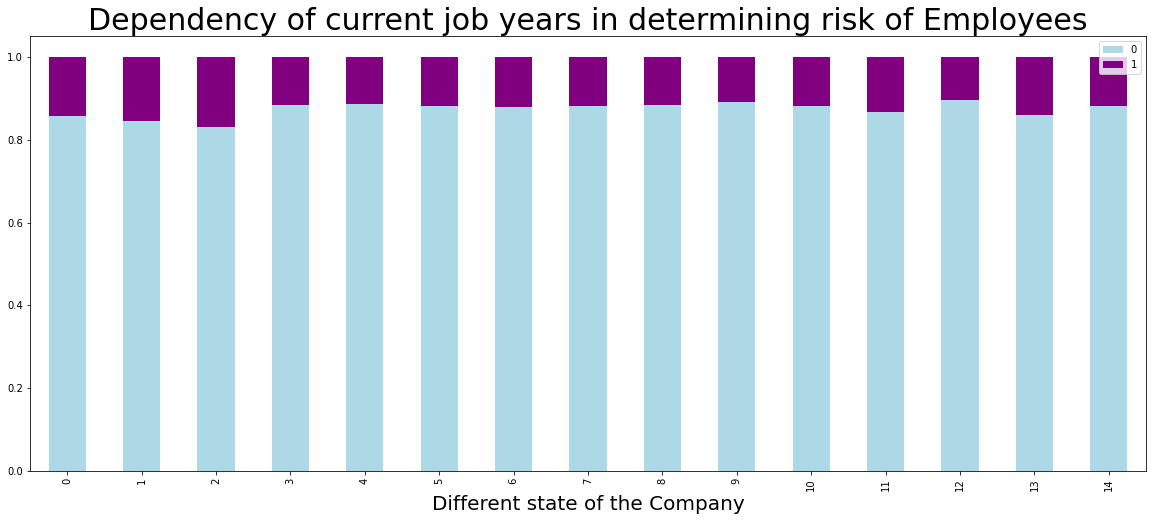

In [47]:
data = pd.crosstab(train_data['current_job_years'], train_data['risk_flag'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'purple'])

plt.title('Dependency of current job years in determining risk of Employees', fontsize = 30)
plt.xlabel('Different state of the Company', fontsize = 20)
plt.legend()
plt.show()

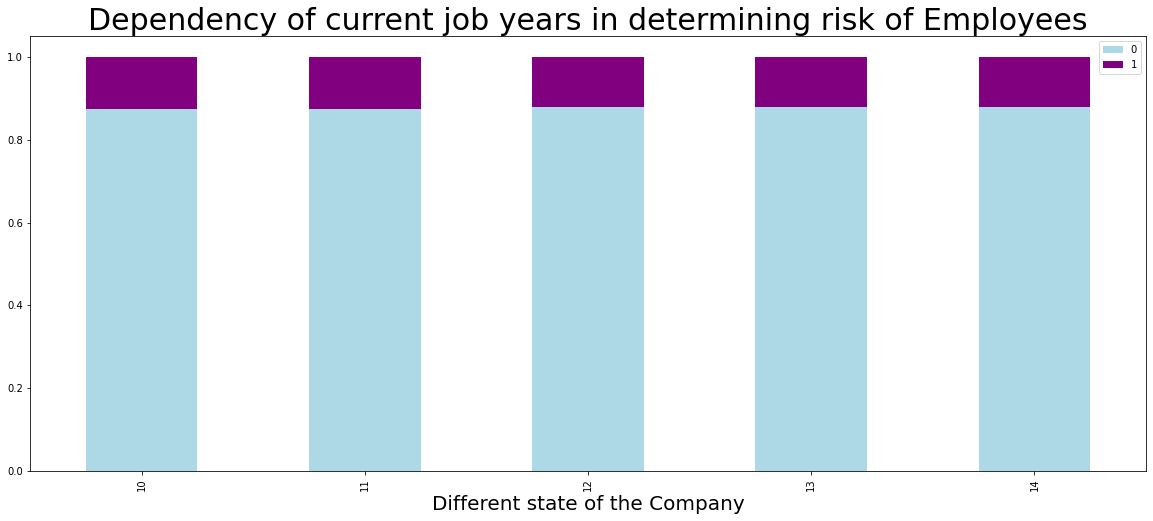

In [48]:
data = pd.crosstab(train_data['current_house_years'], train_data['risk_flag'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'purple'])

plt.title('Dependency of current job years in determining risk of Employees', fontsize = 30)
plt.xlabel('Different state of the Company', fontsize = 20)
plt.legend()
plt.show()

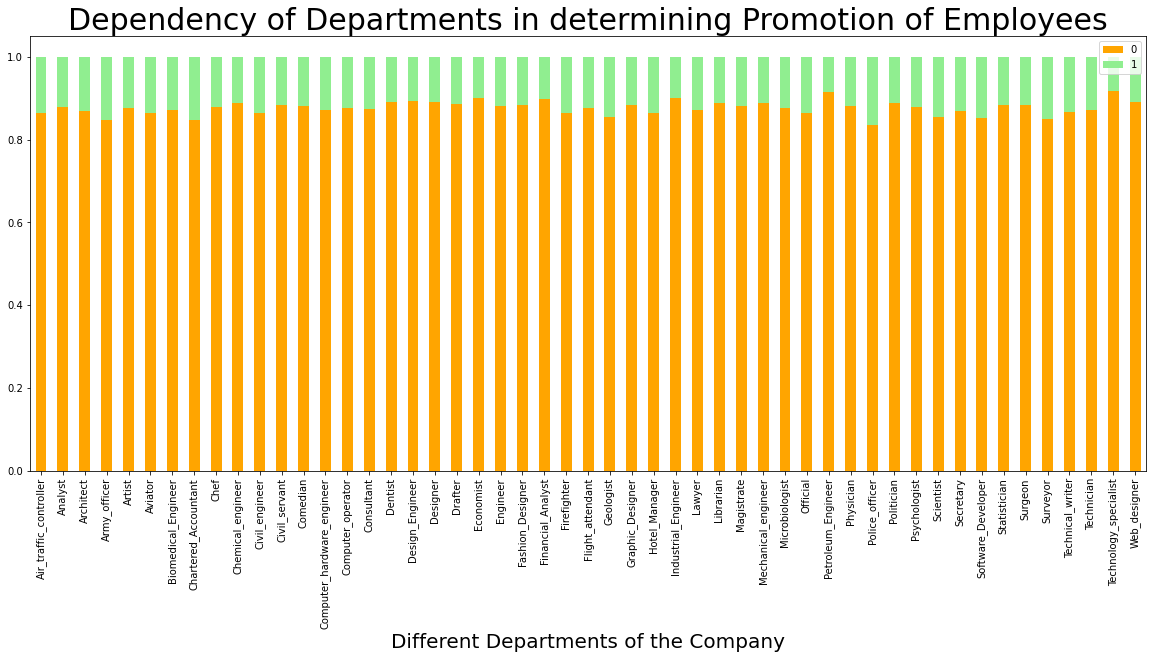

In [49]:
data = pd.crosstab(train_data['profession'], train_data['risk_flag'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['orange', 'lightgreen'])

plt.title('Dependency of Departments in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Departments of the Company', fontsize = 20)
plt.legend()
plt.show()

**Dropping city column**

In [50]:
train_data.drop(columns='city',inplace=True)

In [51]:
train_data.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,state,current_job_years,current_house_years,risk_flag
0,1,0,0,0,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,2,3,1,2,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,3,1,3,0,married,rented,no,Technical_writer,Kerala,4,10,0
3,4,2,1,0,single,rented,yes,Software_Developer,Odisha,2,12,1
4,5,2,1,2,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1


In [52]:
test_data.drop(columns='city',inplace=True)

In [53]:
test_data.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,state,current_job_years,current_house_years
0,1,2,2,3,single,rented,no,Geologist,West Bengal,4,13
1,2,0,0,1,single,rented,no,Firefighter,Maharashtra,5,10
2,3,3,2,2,single,rented,no,Lawyer,Maharashtra,9,14
3,4,0,1,1,married,rented,yes,Analyst,Maharashtra,3,12
4,5,0,0,3,single,rented,yes,Comedian,West Bengal,13,11


# Data Preprocessing

**removing the employee_id colum**

In [54]:

train_data.drop(columns=['Id'],inplace=True)

train_data.columns

Index(['income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'state', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

In [55]:
train_data.head()

,income,age,experience,married,house_ownership,car_ownership,profession,state,current_job_years,current_house_years,risk_flag
0,0,0,0,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,3,1,2,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,1,3,0,married,rented,no,Technical_writer,Kerala,4,10,0
3,2,1,0,single,rented,yes,Software_Developer,Odisha,2,12,1
4,2,1,2,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1


**saving the employee_id for further usage**

In [56]:


emp_id = test_data['id']

# removing the employee_id column

test_data = test_data.drop(['id'], axis = 1)

test_data.columns

Index(['income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'state', 'current_job_years',
       'current_house_years'],
      dtype='object')

**Test Set Creation**

In [57]:


x_test = test_data

x_test.columns

Index(['income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'state', 'current_job_years',
       'current_house_years'],
      dtype='object')

**One hot encoder for handiling Categorical Data**

In [58]:


x_test = pd.get_dummies(x_test)

x_test.columns

Index(['income', 'age', 'experience', 'current_job_years',
       'current_house_years', 'married_married', 'married_single',
       'house_ownership_norent_noown', 'house_ownership_owned',
       'house_ownership_rented', 'car_ownership_no', 'car_ownership_yes',
       'profession_Air traffic controller', 'profession_Analyst',
       'profession_Architect', 'profession_Army officer', 'profession_Artist',
       'profession_Aviator', 'profession_Biomedical Engineer',
       'profession_Chartered Accountant', 'profession_Chef',
       'profession_Chemical engineer', 'profession_Civil engineer',
       'profession_Civil servant', 'profession_Comedian',
       'profession_Computer hardware engineer', 'profession_Computer operator',
       'profession_Consultant', 'profession_Dentist',
       'profession_Design Engineer', 'profession_Designer',
       'profession_Drafter', 'profession_Economist', 'profession_Engineer',
       'profession_Fashion Designer', 'profession_Financial Analyst',
 

**Spllitting of training set**

In [59]:


x = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (252000, 10)
Shape of y: (252000,)


In [60]:


x = pd.get_dummies(x)

x.columns

Index(['income', 'age', 'experience', 'current_job_years',
       'current_house_years', 'married_married', 'married_single',
       'house_ownership_norent_noown', 'house_ownership_owned',
       'house_ownership_rented', 'car_ownership_no', 'car_ownership_yes',
       'profession_Air_traffic_controller', 'profession_Analyst',
       'profession_Architect', 'profession_Army_officer', 'profession_Artist',
       'profession_Aviator', 'profession_Biomedical_Engineer',
       'profession_Chartered_Accountant', 'profession_Chef',
       'profession_Chemical_engineer', 'profession_Civil_engineer',
       'profession_Civil_servant', 'profession_Comedian',
       'profession_Computer_hardware_engineer', 'profession_Computer_operator',
       'profession_Consultant', 'profession_Dentist',
       'profession_Design_Engineer', 'profession_Designer',
       'profession_Drafter', 'profession_Economist', 'profession_Engineer',
       'profession_Fashion_Designer', 'profession_Financial_Analyst',
 

**Oversampling of model**

In [61]:
pip install imblearn

     |████████████████████████████████| 22.3 MB 146 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.2 which is incompatible.
hypertools 0.7.0 requires scikit-learn!=0.22,<0.24,>=0.19.1, but you have scikit-learn 0.24.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [62]:
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_resample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (442008, 92)
Size of y-sample : (442008, 1)


**splitting x and y into train and validation sets**

In [63]:



from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_sample, y_sample, test_size = 0.2, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (353606, 92)
Shape of x_valid:  (88402, 92)
Shape of y_train:  (353606, 1)
Shape of y_valid:  (88402, 1)


**standard scaling**

In [64]:


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)
x_valid = sc.transform(x_valid)

applying pca

In [65]:


from sklearn.decomposition import PCA

pca = PCA(n_components = None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_valid = pca.transform(x_valid)


# Modelling

# 1) Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)

print("Training Accuracy :", rfc.score(x_train, y_train))

print("Validation Accuracy :", rfc.score(x_valid, y_valid))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Training Accuracy : 0.957410224939622
Validation Accuracy : 0.9403407162733874


 # 2) XG Boost Classifier

In [67]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)

print("Training Accuracy :", xgb.score(x_train, y_train))

print("Validation Accuracy :", xgb.score(x_valid, y_valid))




/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[10:50:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy : 0.9349190907394105
Validation Accuracy : 0.9317549376710934


# 3)Light Gradient Boosting

In [68]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [69]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

lgb = LGBMClassifier()
lgb.fit(x_train, y_train)

lgb_pred = lgb.predict(x_test)

print("Training Accuracy :", lgb.score(x_train, y_train))

print("Validation Accuracy :", lgb.score(x_valid, y_valid))



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training Accuracy : 0.9127192411893463
Validation Accuracy : 0.9111558562023484


# 4) CAT boost

In [70]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [71]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(learning_rate = 0.004, early_stopping_rounds = 100)
cbc.fit(x_train, y_train)

cbc_pred = cbc.predict(x_test)

print("Training Accuracy :", rfc.score(x_train, y_train))

print("Validation Accuracy :", rfc.score(x_valid, y_valid))




0:	learn: 0.6912563	total: 172ms	remaining: 2m 52s
1:	learn: 0.6898170	total: 278ms	remaining: 2m 18s
2:	learn: 0.6880933	total: 393ms	remaining: 2m 10s
3:	learn: 0.6868092	total: 511ms	remaining: 2m 7s
4:	learn: 0.6851337	total: 628ms	remaining: 2m 4s
5:	learn: 0.6835984	total: 741ms	remaining: 2m 2s
6:	learn: 0.6826129	total: 866ms	remaining: 2m 2s
7:	learn: 0.6809387	total: 973ms	remaining: 2m
8:	learn: 0.6794564	total: 1.08s	remaining: 1m 59s
9:	learn: 0.6778895	total: 1.21s	remaining: 1m 59s
10:	learn: 0.6765956	total: 1.32s	remaining: 1m 59s
11:	learn: 0.6755051	total: 1.5s	remaining: 2m 3s
12:	learn: 0.6740343	total: 1.67s	remaining: 2m 7s
13:	learn: 0.6731136	total: 1.85s	remaining: 2m 10s
14:	learn: 0.6722994	total: 2.02s	remaining: 2m 12s
15:	learn: 0.6714303	total: 2.19s	remaining: 2m 14s
16:	learn: 0.6704694	total: 2.36s	remaining: 2m 16s
17:	learn: 0.6695902	total: 2.52s	remaining: 2m 17s
18:	learn: 0.6686995	total: 2.65s	remaining: 2m 16s
19:	learn: 0.6679186	total: 2.77s

# END OF NOTEBOOK ❤❤